# Data Storytelling: The Euro-USD Exchange Rate through Past US Presidencies

## Background

The title says it all. This is an appendix to our project on explanatory data visualization, and we are going to create a graph for one of our other ideas. This will be the first in a series.

Specifically, we will show comparatively how the euro-dollar rate changed under the last three US presidencies — George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021). Under the title and subtitle, we will create a 1x3 grid chart with each subplot as a line graph depicting a specific presidency, and each president will be color coded. Then, under the grid chart, we will add another larger line graph putting together the three presidential subplots contiguously for comparative purposes. The graph will take the FiveThirtyEight style.

## Coding

In [2]:
# Read in the dataset
import pandas as pd
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

# Clean the dataset
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

# Isolate euro-USD exchange rate data
euro_to_dollar = pd.DataFrame(exchange_rates[['Time', 'US_dollar']]).copy()
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

# Extract relevant data
bush = euro_to_dollar.copy(
       )[(euro_to_dollar['Time'].dt.year >= 2001
       ) & (euro_to_dollar['Time'].dt.year <= 2008)]
obama = euro_to_dollar.copy(
       )[(euro_to_dollar['Time'].dt.year >= 2009
       ) & (euro_to_dollar['Time'].dt.year <= 2016)]
trump = euro_to_dollar.copy(
       )[(euro_to_dollar['Time'].dt.year >= 2017
       ) & (euro_to_dollar['Time'].dt.year <= 2020)]
total = euro_to_dollar.copy(
       )[(euro_to_dollar['Time'].dt.year >= 2001
       ) & (euro_to_dollar['Time'].dt.year <= 2020)]

[10957. 11323. 11688. 12053. 12418. 12784. 13149. 13514. 13879. 14245.]
[1.  1.2 1.4 1.6]
[13879. 14245. 14610. 14975. 15340. 15706. 16071. 16436. 16801. 17167.]
[1.  1.2 1.4 1.6]
[17167. 17348. 17532. 17713. 17897. 18078. 18262. 18444. 18628.]
[1.  1.2 1.4 1.6]


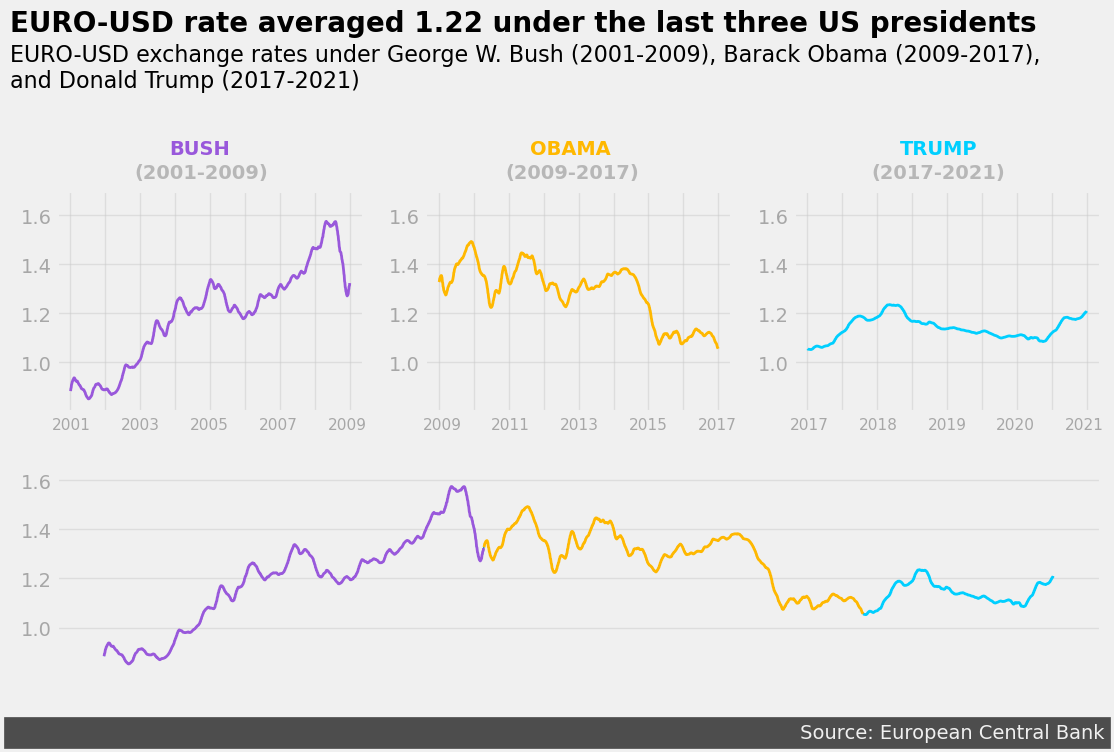

In [4]:
# Import Matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
style.use('fivethirtyeight')

# Create the subplots, will explain strategy later
plt.figure(figsize=(12,6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

# Add the subplots
ax1.plot(bush['Time'], bush['rolling_mean'], linewidth=2, color='#9958db')
ax2.plot(obama['Time'], obama['rolling_mean'], linewidth=2, color='#ffb800')
ax3.plot(trump['Time'], trump['rolling_mean'], linewidth=2, color='#00cfff')

ax4.plot(total['Time'], total['rolling_mean'], linewidth=1)
ax4.plot(bush['Time'], bush['rolling_mean'], linewidth=2, color='#9958db')
ax4.plot(obama['Time'], obama['rolling_mean'], linewidth=2, color='#ffb800')
ax4.plot(trump['Time'], trump['rolling_mean'], linewidth=2, color='#00cfff')
ax4.set_xticks([])

# Modifications for all subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6], ['1.0', '1.2', '1.4', '1.6'], alpha=0.3)
    ax.grid(alpha=0.5)
    ax.set_xticklabels([])

# Rewrite and position x-axis ticks
for ax in [ax1, ax2, ax3]:
    print(ax.get_xticks())
    print(ax.get_yticks())

bush_x = 13220.0
for year in [2001, 2003, 2005, 2007, 2009]:
    ax.text(bush_x, 0.73, year, alpha=0.3, fontsize=11)
    bush_x += 360

obama_x = 15155.0
for year in [2009, 2011, 2013, 2015, 2017]:
    ax.text(obama_x, 0.73, year, alpha=0.3, fontsize=11)
    obama_x += 360

trump_x = 17075.0
for year in [2017, 2018, 2019, 2020, 2021]:
    ax.text(trump_x, 0.73, year, alpha=0.3, fontsize=11)
    trump_x += 360

# Add subplot titles
ax.text(13830.0, 1.85, 'BUSH', color='#9958db', weight='bold')
ax.text(13650.0, 1.75, '(2001-2009)', color='grey', weight='bold', alpha=0.5)

ax.text(15715.0, 1.85, 'OBAMA', color='#ffb800', weight='bold')
ax.text(15590.0, 1.75, '(2009-2017)', color='grey', weight='bold', alpha=0.5)

ax.text(17650.0, 1.85, 'TRUMP', color='#00cfff', weight='bold')
ax.text(17500.0, 1.75, '(2017-2021)', color='grey', weight='bold', alpha=0.5)

# Add chart title and subtitle
ax.text(13000.0, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
        fontsize=20, weight='bold')
ax.text(13000.0, 2.12, '''EURO-USD exchange rates under George W. Bush (2001-2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

# Add signature
ax4.text(10600.0, 0.55, ' '*129 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)
    
plt.show()

## Commentary

Firstly, you'll notice we used Matplotlib's functional, instead of object-oriented, approach to build the graphs. We used this approach because it offers more flexibility in arranging the subplots. As you may recall in the background section, this is the most feasible way we were able to arrange a 1x3 grid on the top and a larger graph on the bottom:

- We first built three of the graphs on a 2x3 grid (this grid should have six subplots, but we only built three; the bottom row remains empty).
- We then built only the bottom graph of a 2x1 grid (this grid should have two subplots; the top row remains empty).
- The two grids are merged, and we end up with three graphs on the top row and one graph on the bottom row.

As an aside, when trying to position various chart elements — especially text — I was using the general `ax` and a specific subplot, like `ax4`, interchangeably. Thankfully I was able to make everything work and appear in the right places after a bit of trial and error, but I am learning that x- and y- values are dependent on the plot of reference. Because I am still new to this, I had assumed there would be fixed or absolute x- and y-coordinates for the chart area, but that does not actually appear to be the case. In my next graphs there should begin to be more consistency in the code as a result of better understanding of Matplotlib mechanisms.

Finally, we'll quickly go over some of the design principles involved in the making of this graph.

- Differentiation of presidents in both sets of graphs via the principle of similarity in color
- Separation of signature from the rest of the graph via the principle of enclosure
- Presentation of data through a line graph, a widely recognized format, via the familiarity principle
- We also maximized data ink by:
    - Lightening grid lines
    - Removing y-grid lines from the bottom graph
    - Communicating main takeaways and context in the title and subtitle
- The bright colors against a muted, gray background also make them serve as pre-attentive attributes and immediately draw the reader's eye to the data instead of to the chart's structural elements.